In [488]:
import pandas as pd

data = pd.read_csv('Assessment 1.1 - RAW data lawnmower_var_135223.csv')
data

,NAME,WIDTH,PRICE,POWER,GRASS,AREA,DESCRIPTION
0,Champion NPI256,41.0,22000.0,1.55,30.0,450.0,Широкая полоса скашивания на данной газонокоси...
1,Nakita CPA252,44.0,37000.0,1.85,60.0,400.0,Широкая полоса скашивания на данной газонокоси...
2,Champion XUB235,33.0,15000.0,1.50,40.0,600.0,Узкая ширина скашиваемой полосы на данной газо...
3,Gardez GYW727,NaN,39000.0,1.65,50.0,200.0,Широкая полоса скашивания на данной газонокоси...
4,Gardez WBB365,30.0,25000.0,1.45,70.0,350.0,Узкая ширина скашиваемой полосы на данной газо...
...,...,...,...,...,...,...,...
195,Gardez OFR312,35.0,28000.0,1.45,25.0,200.0,Узкая ширина скашиваемой полосы на данной газо...
196,Worx IGI227,44.0,30000.0,1.90,70.0,400.0,Широкая полоса скашивания на данной газонокоси...
197,Champion EMQ445,36.0,38000.0,0.80,50.0,500.0,Средняя ширина скашиваемой полосы на данной га...
198,Bear QAO719,35.0,11000.0,1.20,55.0,350.0,Узкая ширина скашиваемой полосы на данной газо...


Не все оказалось идеально с данными. Некоторые значения оказались пропущены, некоторые явно содержали экстремальные выбросы. Юрию пришлось обработать исходные данные следующим образом:

1. Параметр "Ширина скашиваемой полосы" содержал много пропущенных значений. Юрий придумал следующий алгоритм по их восстановлению:

Если в описании газонокосилки встречались слова "узкая|узкие|узкую|узкой", то значение восстанавливалось как медиана по существующим в исходном датасете значениям в диапазоне от 30 до 35.
Введите медиану по существующим в исходном датасете значениям в диапазоне от 30 до 35.

In [489]:
filtered_width_30_35 = data[data['WIDTH'].between(30, 35, inclusive='both')]['WIDTH']

median_width_30_35 = filtered_width_30_35.median()

median_width_30_35

32.0

Если встречались слова "средняя ширина"/"ширина средняя", то значение восстанавливалось как округленное до целого среднее арифметическое по существующим значениям в диапазоне от 36 до 40.
Введите округленное до целого среднее арифметическое п

In [490]:
mean_width_36_40 = data[data['WIDTH'].between(36,40,inclusive='both')]['WIDTH'].mean()
mean_width_36_40 = mean_width_36_40.round()
mean_width_36_40

38.0

Если встречались слова ("широкая" и "полоса")/("широкие" и "полосы"), то значение восстанавливалось как медиана по существующим значениям в диапазоне от 41 до 45.
Введите медиану по существующим в исходном датасете значениям в диапазоне от 41 до 45.

Введите среднее арифметическое для параметра "Ширина скашиваемой полосы" после восстановления пропущенных значений:

In [491]:
median_width_41_45 = data[data['WIDTH'].between(41,45,inclusive='both')]['WIDTH'].median()
median_width_41_45

42.0

Введите среднее арифметическое для параметра "Ширина скашиваемой полосы" после восстановления пропущенных значений:

In [492]:
# Восстановление пропущенных значений
data.loc[data['WIDTH'].isnull() & data['DESCRIPTION'].str.match("^узк",case=False), 'WIDTH'] = median_width_30_35
data.loc[data['DESCRIPTION'].str.match("^узк",case=False,na=False)]

,NAME,WIDTH,PRICE,POWER,GRASS,AREA,DESCRIPTION
2,Champion XUB235,33.0,15000.0,1.50,40.0,600.0,Узкая ширина скашиваемой полосы на данной газо...
4,Gardez WBB365,30.0,25000.0,1.45,70.0,350.0,Узкая ширина скашиваемой полосы на данной газо...
6,Nakita YKK799,35.0,20000.0,1.75,75.0,600.0,Узкая ширина скашиваемой полосы на данной газо...
7,Champion SVB864,33.0,47000.0,0.95,40.0,500.0,Узкая ширина скашиваемой полосы на данной газо...
8,Bear EUZ148,34.0,49000.0,1.95,75.0,400.0,Узкая ширина скашиваемой полосы на данной газо...
...,...,...,...,...,...,...,...
188,Boch CJB382,32.0,32000.0,1.00,70.0,250.0,Узкая ширина скашиваемой полосы на данной газо...
190,Nakita AEV719,32.0,743463.0,1.55,60.0,400.0,Узкая ширина скашиваемой полосы на данной газо...
192,Bear RBB398,33.0,40000.0,1.05,75.0,450.0,Узкая ширина скашиваемой полосы на данной газо...
195,Gardez OFR312,35.0,28000.0,1.45,25.0,200.0,Узкая ширина скашиваемой полосы на данной газо...


In [493]:
data.loc[data['WIDTH'].isnull() & data['DESCRIPTION'].str.match("средняя ширина|ширина средняя",case=False), 'WIDTH'] = mean_width_36_40
data.loc[data['DESCRIPTION'].str.match("средняя ширина|ширина средняя",case=False,na=False)]

,NAME,WIDTH,PRICE,POWER,GRASS,AREA,DESCRIPTION
9,Wolf JGN773,39.0,14000.0,1.00,30.0,350.0,Средняя ширина скашиваемой полосы на данной га...
10,Cooper RCR719,38.0,36000.0,0.95,65.0,350.0,Средняя ширина скашиваемой полосы на данной га...
14,Cooper GKI494,39.0,44000.0,1.40,75.0,600.0,Средняя ширина скашиваемой полосы на данной га...
15,Cooper AEA582,36.0,9000.0,1.35,45.0,600.0,Средняя ширина скашиваемой полосы на данной га...
16,Gardez TGZ222,38.0,43000.0,1.70,35.0,300.0,Средняя ширина скашиваемой полосы на данной га...
...,...,...,...,...,...,...,...
179,Gardez MCQ196,40.0,36000.0,1.35,45.0,600.0,Средняя ширина скашиваемой полосы на данной га...
183,Worx FXP214,40.0,21000.0,1.40,70.0,550.0,Средняя ширина скашиваемой полосы на данной га...
193,Wolf ZKL533,36.0,31000.0,1.80,65.0,400.0,Средняя ширина скашиваемой полосы на данной га...
194,Gardez AQP234,37.0,37000.0,1.20,25.0,350.0,Средняя ширина скашиваемой полосы на данной га...


In [494]:
data.loc[data['WIDTH'].isnull() & data['DESCRIPTION'].str.match("широкая.*полоса|широкие.*полосы",case=False), 'WIDTH'] = median_width_41_45
data.loc[data['DESCRIPTION'].str.match("широкая.*полоса|широкие.*полосы",case=False,na=False)]

,NAME,WIDTH,PRICE,POWER,GRASS,AREA,DESCRIPTION
0,Champion NPI256,41.0,22000.0,1.55,30.0,450.0,Широкая полоса скашивания на данной газонокоси...
1,Nakita CPA252,44.0,37000.0,1.85,60.0,400.0,Широкая полоса скашивания на данной газонокоси...
3,Gardez GYW727,42.0,39000.0,1.65,50.0,200.0,Широкая полоса скашивания на данной газонокоси...
5,Bear YXK272,43.0,42000.0,0.85,40.0,250.0,Широкая полоса скашивания на данной газонокоси...
12,Champion FFA517,44.0,44000.0,1.30,70.0,250.0,Широкая полоса скашивания на данной газонокоси...
18,Wolf UIM773,44.0,23000.0,1.50,30.0,550.0,Широкая полоса скашивания на данной газонокоси...
21,Nakita VNS181,42.0,29000.0,1.20,35.0,250.0,Широкая полоса скашивания на данной газонокоси...
23,Bear SUJ689,42.0,36000.0,1.00,35.0,550.0,Широкая полоса скашивания на данной газонокоси...
25,Nakita MHM126,42.0,NaN,NaN,40.0,400.0,Широкая полоса скашивания на данной газонокоси...
29,Nakita EUJ593,44.0,42000.0,1.50,45.0,350.0,Широкая полоса скашивания на данной газонокоси...


In [495]:
data['WIDTH'].isnull().unique()

array([False])

In [496]:
data['WIDTH'].mean()

37.37

2. Цены на газонокосилки имели очень большой разброс и Юрий решил избавиться от вариантов, стоимость которых попадала под определение "экстремальных выбросов".

In [497]:
# lower and upper bounds calculation for extreme outliers (3*iqr) via inter-quantile range (IQR)
q1 = data['PRICE'].quantile(0.25)
q3 = data['PRICE'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 3 * iqr
upper_bound = q3 + 3 * iqr
q1,q3,iqr,lower_bound,upper_bound

(18000.0, 39000.0, 21000.0, -45000.0, 102000.0)

In [498]:
# arrays extreme outlier rows
outlier = data['PRICE'][(data['PRICE']<lower_bound) | (data['PRICE']>upper_bound)]

outlier

46     981225.0
72     239873.0
103    301423.0
123    655158.0
190    743463.0
Name: PRICE, dtype: float64

In [499]:
# remove extreme outliers
data.drop(index=outlier.index,inplace=True)

3. Затем Юрий исключил записи в которых все еще оставались пропущенные значения.

In [500]:
# remove NaNs
data.dropna(inplace=True)

Введите количество оставшихся к рассмотрению газонокосилок:

In [501]:
data.count()

NAME           183
WIDTH          183
PRICE          183
POWER          183
GRASS          183
AREA           183
DESCRIPTION    183
dtype: int64

Введите среднее арифметическое для параметра "Стоимость" полученного после обработки набора данных:

In [502]:
data['PRICE'].mean()

28125.683060109288

4. Параметры газонокосилок имеют разную размерность, так что Юрий решил экспоненциально нормировать значения числовых параметров.

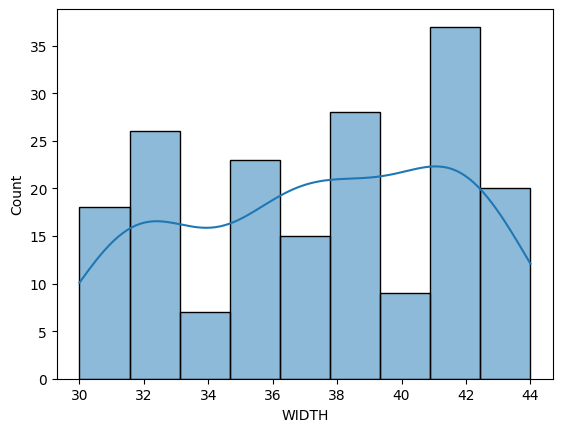

In [503]:
# Type of distribution
# via Visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(data['WIDTH'], kde=True)
plt.show()

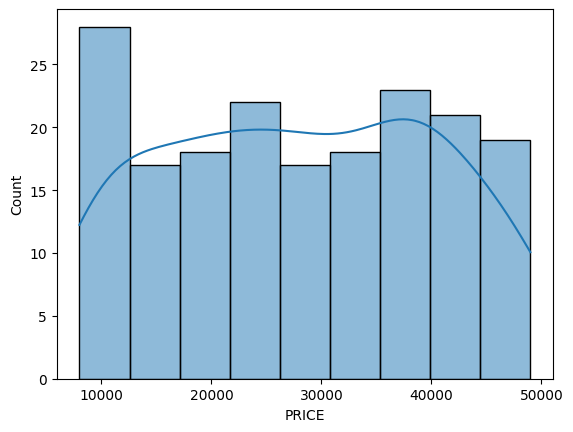

In [504]:
sns.histplot(data['PRICE'], kde=True)
plt.show()

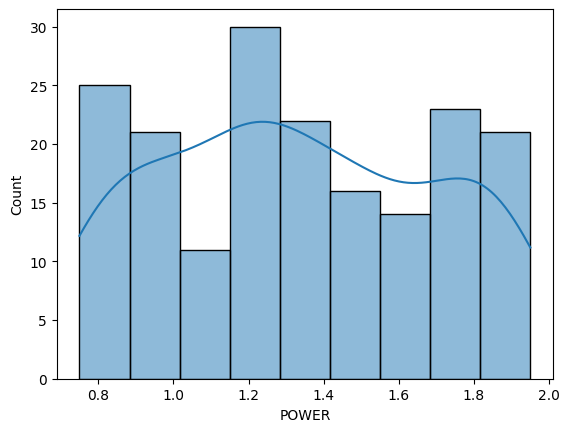

In [505]:
sns.histplot(data['POWER'], kde=True)
plt.show()

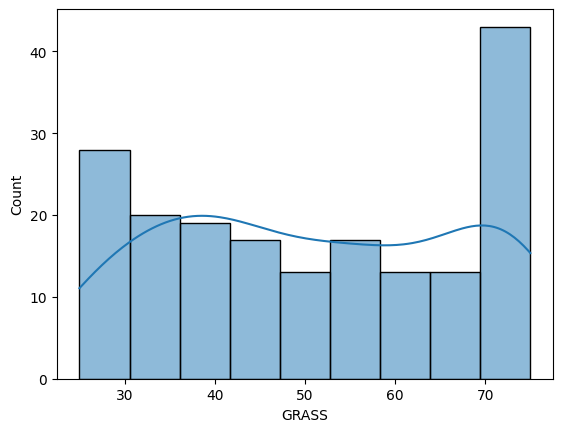

In [506]:
sns.histplot(data['GRASS'], kde=True)
plt.show()

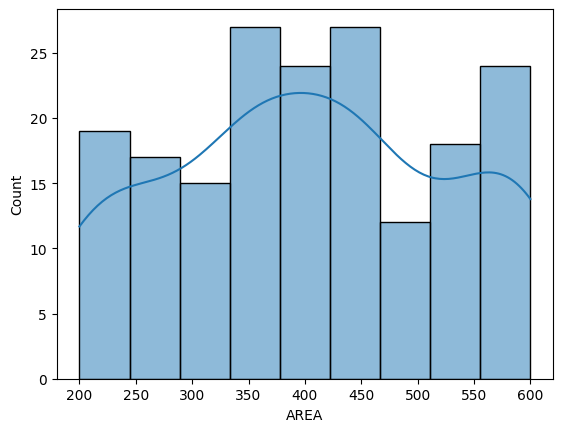

In [507]:
sns.histplot(data['AREA'], kde=True)
plt.show()

In [508]:
# via statistical tests
# check for normal data (Если p-value меньше некоторого уровня значимости (обычно 0.05), вы можете отклонить нулевую гипотезу о нормальности данных.)
from scipy import stats

statistic, p_value = stats.shapiro(data['WIDTH'])
print(f"Статистика теста: {statistic}, p-value: {p_value}")

Статистика теста: 0.9450726509094238, p-value: 1.7320736560577643e-06


In [509]:
statistic, p_value = stats.shapiro(data['PRICE'])
print(f"Статистика теста: {statistic}, p-value: {p_value}")

Статистика теста: 0.9526605010032654, p-value: 8.514228284184355e-06


In [510]:
statistic, p_value = stats.shapiro(data['POWER'])
print(f"Статистика теста: {statistic}, p-value: {p_value}")

Статистика теста: 0.9508020877838135, p-value: 5.697213509847643e-06


In [511]:
statistic, p_value = stats.shapiro(data['GRASS'])
print(f"Статистика теста: {statistic}, p-value: {p_value}")

Статистика теста: 0.9281492829322815, p-value: 7.346591246459866e-08


In [512]:
statistic, p_value = stats.shapiro(data['AREA'])
print(f"Статистика теста: {statistic}, p-value: {p_value}")

Статистика теста: 0.937224805355072, p-value: 3.766803899907245e-07


In [513]:
# via Descriptive statistics
data_dist = pd.DataFrame(columns=['VALUE_TYPE','MEAN','MEDIAN'])

for column in ['WIDTH', 'PRICE', 'POWER', 'GRASS', 'AREA']:
    mean_value = data[column].mean()
    median_value = data[column].median()
    new_row = {'VALUE_TYPE':column, 'MEAN':mean_value, 'MEDIAN':median_value}
    data_dist.loc[column] = new_row
    
data_dist

,VALUE_TYPE,MEAN,MEDIAN
WIDTH,WIDTH,37.442623,38.0
PRICE,PRICE,28125.683060,28000.0
POWER,POWER,1.331421,1.3
GRASS,GRASS,50.956284,50.0
AREA,AREA,404.644809,400.0


In [514]:
# Exp normalization
import  numpy as np

data_normalized = data.copy()
numeric_columns = data_normalized.select_dtypes(include=[np.number])
numeric_columns = 1 - np.exp(1 - numeric_columns/numeric_columns.min())
data_normalized[numeric_columns.columns] = numeric_columns
data_normalized['FUNC'] = 0
data_normalized

,NAME,WIDTH,PRICE,POWER,GRASS,AREA,DESCRIPTION,FUNC
0,Champion NPI256,0.306959,0.826226,0.655846,0.181269,0.713495,Широкая полоса скашивания на данной газонокоси...,0
1,Nakita CPA252,0.372911,0.973351,0.769307,0.753403,0.632121,Широкая полоса скашивания на данной газонокоси...,0
2,Champion XUB235,0.095163,0.583138,0.632121,0.451188,0.864665,Узкая ширина скашиваемой полосы на данной газо...,0
3,Gardez GYW727,0.329680,0.979246,0.698806,0.632121,0.000000,Широкая полоса скашивания на данной газонокоси...,0
4,Gardez WBB365,0.000000,0.880567,0.606759,0.834701,0.527633,Узкая ширина скашиваемой полосы на данной газо...,0
...,...,...,...,...,...,...,...,...
195,Gardez OFR312,0.153518,0.917915,0.606759,0.000000,0.000000,Узкая ширина скашиваемой полосы на данной газо...,0
196,Worx IGI227,0.372911,0.936072,0.784185,0.834701,0.632121,Широкая полоса скашивания на данной газонокоси...,0
197,Champion EMQ445,0.181269,0.976482,0.064493,0.632121,0.776870,Средняя ширина скашиваемой полосы на данной га...,0
198,Bear QAO719,0.153518,0.312711,0.451188,0.698806,0.527633,Узкая ширина скашиваемой полосы на данной газо...,0


Введите нормированные значения параметров газнокосилки Cooper RCR719:

Ширина скашиваемой полосы:
Стоимость:
Мощность:
Объем травосборника:
Площадь скашиваемой поверхности на одном заряде аккумулятора:

In [515]:
data_normalized.loc[data['NAME'].str.match("Cooper RCR719",case=False,na=False)]

,NAME,WIDTH,PRICE,POWER,GRASS,AREA,DESCRIPTION,FUNC
10,Cooper RCR719,0.234072,0.969803,0.234072,0.798103,0.527633,Средняя ширина скашиваемой полосы на данной га...,0


5. И наконец, Юрий составил целевую функцию, на основе которой определил 3 наиболее подходящие (на его взгляд) газонокосилки. При определении целевой функции он использовал следующие слагаемые:

- Нормированная ширина скашиваемой полосы с коэффициентом 2
- Стоимость как слагаемое вида (1 - нормированная стоимость) с коэффициентом 1
- Нормированную мощность с коэффициентом 5
- Нормированный объём травосборника с коэффициентом 8
- Нормированную площадь скашиваемой поверхности с коэффициентом 5

Какие 3 газонокосилки являются лучшими (по целевой функции Юрия)? Введите три названия газонокосилок через запятую, например Cooper XWZ182, Nakita 74FHSC, Cooper INH176

In [516]:
data_normalized['FUNC'] = data_normalized['WIDTH']*2-data_normalized['PRICE']*1+data_normalized['POWER']*5+data_normalized['GRASS']*8+data_normalized['AREA']*5
sorted_values = data_normalized.sort_values(['FUNC'],ascending=False)
sorted_values

,NAME,WIDTH,PRICE,POWER,GRASS,AREA,DESCRIPTION,FUNC
6,Nakita YKK799,0.153518,0.776870,0.736403,0.864665,0.864665,Узкая ширина скашиваемой полосы на данной газо...,14.452822
55,Bear IDC946,0.124827,0.312711,0.678042,0.834701,0.776870,Узкая ширина скашиваемой полосы на данной газо...,13.889109
84,Wolf GBX814,0.234072,0.221199,0.753403,0.834701,0.632121,Средняя ширина скашиваемой полосы на данной га...,13.852171
14,Cooper GKI494,0.259182,0.988891,0.579650,0.864665,0.864665,Средняя ширина скашиваемой полосы на данной га...,13.668362
102,Cooper KHW476,0.259182,0.117503,0.736403,0.864665,0.527633,Средняя ширина скашиваемой полосы на данной га...,13.638360
...,...,...,...,...,...,...,...,...
145,Gardez ZFH797,0.153518,0.992365,0.550671,0.000000,0.393469,Узкая ширина скашиваемой полосы на данной газо...,4.035374
13,Boch ATS658,0.064493,0.990196,0.451188,0.181269,0.221199,Узкая ширина скашиваемой полосы на данной газо...,3.950882
189,Worx UTR966,0.306959,0.117503,0.000000,0.181269,0.393469,Широкая полоса скашивания на данной газонокоси...,3.913916
195,Gardez OFR312,0.153518,0.917915,0.606759,0.000000,0.000000,Узкая ширина скашиваемой полосы на данной газо...,2.422918


In [517]:
first_three_names = sorted_values['NAME'].head(3)
first_three_names

6     Nakita YKK799
55      Bear IDC946
84      Wolf GBX814
Name: NAME, dtype: object

In [518]:
first_three_names_comma = ','.join(first_three_names)
first_three_names_comma

'Nakita YKK799,Bear IDC946,Wolf GBX814'

In [519]:
data

,NAME,WIDTH,PRICE,POWER,GRASS,AREA,DESCRIPTION
0,Champion NPI256,41.0,22000.0,1.55,30.0,450.0,Широкая полоса скашивания на данной газонокоси...
1,Nakita CPA252,44.0,37000.0,1.85,60.0,400.0,Широкая полоса скашивания на данной газонокоси...
2,Champion XUB235,33.0,15000.0,1.50,40.0,600.0,Узкая ширина скашиваемой полосы на данной газо...
3,Gardez GYW727,42.0,39000.0,1.65,50.0,200.0,Широкая полоса скашивания на данной газонокоси...
4,Gardez WBB365,30.0,25000.0,1.45,70.0,350.0,Узкая ширина скашиваемой полосы на данной газо...
...,...,...,...,...,...,...,...
195,Gardez OFR312,35.0,28000.0,1.45,25.0,200.0,Узкая ширина скашиваемой полосы на данной газо...
196,Worx IGI227,44.0,30000.0,1.90,70.0,400.0,Широкая полоса скашивания на данной газонокоси...
197,Champion EMQ445,36.0,38000.0,0.80,50.0,500.0,Средняя ширина скашиваемой полосы на данной га...
198,Bear QAO719,35.0,11000.0,1.20,55.0,350.0,Узкая ширина скашиваемой полосы на данной газо...
